In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import zipfile

In [ ]:
!unzip ('/content/drive/MyDrive/ergasia_MLD_qmul.zip')

/bin/bash: -c: line 0: syntax error near unexpected token `'/content/drive/MyDrive/ergasia_MLD_qmul.zip''
/bin/bash: -c: line 0: `unzip ('/content/drive/MyDrive/ergasia_MLD_qmul.zip')'


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ergasia_MLD_qmul.zip", 'r')
zip_ref.extractall("/*")
zip_ref.close()

In [ ]:
!unzip -u "/content/drive/MyDrive/ergasia_MLD_qmul.zip" -d "/content/drive/My Drive/Feelings"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Feelings/ergasia MLD qmul/DISGUST/010432.jpg  
  inflating: /content/drive/My Drive/Feelings/__MACOSX/ergasia MLD qmul/DISGUST/._010432.jpg  
  inflating: /content/drive/My Drive/Feelings/ergasia MLD qmul/DISGUST/009163.jpg  
  inflating: /content/drive/My Drive/Feelings/__MACOSX/ergasia MLD qmul/DISGUST/._009163.jpg  
  inflating: /content/drive/My Drive/Feelings/ergasia MLD qmul/DISGUST/004447.jpg  
  inflating: /content/drive/My Drive/Feelings/__MACOSX/ergasia MLD qmul/DISGUST/._004447.jpg  
  inflating: /content/drive/My Drive/Feelings/ergasia MLD qmul/DISGUST/003328.jpg  
  inflating: /content/drive/My Drive/Feelings/__MACOSX/ergasia MLD qmul/DISGUST/._003328.jpg  
  inflating: /content/drive/My Drive/Feelings/ergasia MLD qmul/DISGUST/004453.jpg  
  inflating: /content/drive/My Drive/Feelings/__MACOSX/ergasia MLD qmul/DISGUST/._004453.jpg  
  inflating: /content/drive/My Drive/Feelings/ergasia 

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/ergasia MLD qmul/ANGER/000046.jpg")

In [ ]:
img_array.shape #rgb

(128, 128, 3)

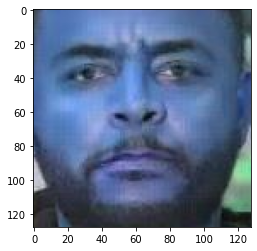

In [ ]:
plt.imshow(img_array)

In [ ]:
Datadirectory = "/content/drive/MyDrive/ergasia MLD qmul/" ##TRAINING DATASET

In [ ]:
Classes = ["ANGER","DISGUST","FEAR","HAPPINESS","SADNESS","SURPRISE"] 

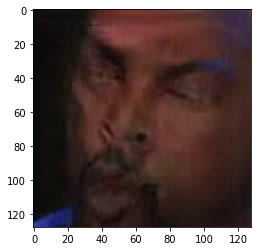

In [ ]:
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array =cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

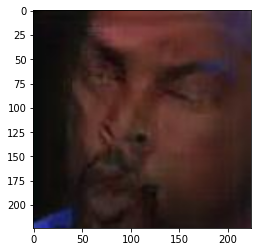

In [ ]:
img_size = 224 ## ImageNet => 224 *224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

# read all the img and convert them to array

In [ ]:
training_Data = [] ## data

def create_training_Data():
  for category in Classes:
    path = os.path. join(Datadirectory, category)
    class_num = Classes.index(category) ## 0 1,## Label
    for img in os.listdir (path) :
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array, (img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

43515


In [ ]:
temp = np.array(training_Data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
temp.shape

(43515, 2)

In [ ]:
import random 

random.shuffle(training_Data)

In [ ]:
X = []
y = []

for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size , img_size ,3)